In [1]:
import pandas as pd

df = pd.read_csv('../data/dataset-2.csv')

C:\Users\Shahin\AppData\Local\Temp\ipykernel_13308\3728809533.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
195,37,No,Travel_Rarely,290,Research & Development,21,3,Life Sciences,1,267,...,1,80,1,8,3,2,8,7,1,7
596,35,No,Travel_Rarely,1258,Research & Development,1,4,Life Sciences,1,826,...,3,80,0,7,0,3,2,2,2,2
715,33,No,Travel_Frequently,827,Research & Development,1,4,Other,1,998,...,1,80,1,6,2,3,6,5,1,2
34,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,...,1,80,1,6,2,2,2,0,2,0
588,50,No,Travel_Rarely,691,Research & Development,2,3,Medical,1,815,...,4,80,0,30,3,3,4,3,0,3


In [8]:
pd.set_option('display.max_columns', None) # Display any number of columns

In [9]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1390,28,Yes,Travel_Rarely,1404,Research & Development,17,3,Technical Degree,1,1960,3,Male,32,2,1,Laboratory Technician,4,Divorced,2367,18779,5,Y,No,12,3,1,80,1,6,2,2,4,1,0,3
751,50,No,Non-Travel,145,Sales,1,3,Life Sciences,1,1040,4,Female,95,3,2,Sales Executive,3,Married,6347,24920,0,Y,No,12,3,1,80,1,19,3,3,18,7,0,13
471,38,No,Travel_Rarely,1495,Research & Development,10,3,Medical,1,634,3,Female,76,3,2,Healthcare Representative,3,Married,9824,22174,3,Y,No,19,3,3,80,1,18,4,3,1,0,0,0
776,20,Yes,Travel_Frequently,769,Sales,9,3,Marketing,1,1077,4,Female,54,3,1,Sales Representative,4,Single,2323,17205,1,Y,Yes,14,3,2,80,0,2,3,3,2,2,0,2
830,41,No,Travel_Rarely,167,Research & Development,12,4,Life Sciences,1,1158,2,Male,46,3,1,Laboratory Technician,4,Married,4766,9051,3,Y,Yes,11,3,1,80,1,6,4,3,1,0,0,0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Shahin\Desktop\Projects\employee-churn-prediction-flask-app\myenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='YearsWithCurrManager', ylabel='Attrition'>

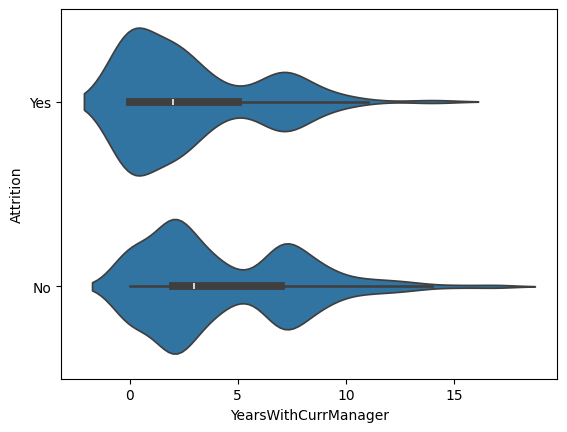

In [30]:
sns.violinplot(y='Attrition', x='YearsWithCurrManager', data=df)

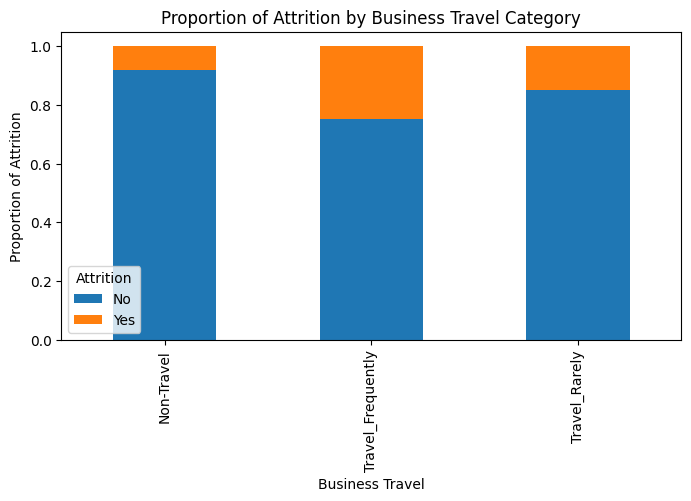

In [32]:
# Creating a cross-tabulation
cross_tab = pd.crosstab(df['BusinessTravel'], df['Attrition'], normalize='index')

# Stacked Bar Chart
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4))

plt.title('Proportion of Attrition by Business Travel Category')
plt.xlabel('Business Travel')
plt.ylabel('Proportion of Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.show()

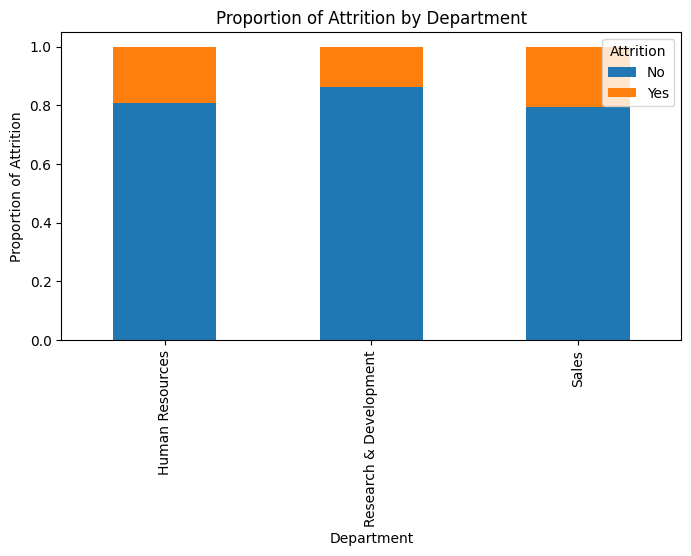

In [33]:
# Creating a cross-tabulation
cross_tab = pd.crosstab(df['Department'], df['Attrition'], normalize='index')

# Stacked Bar Chart
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4))

plt.title('Proportion of Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Proportion of Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.show()

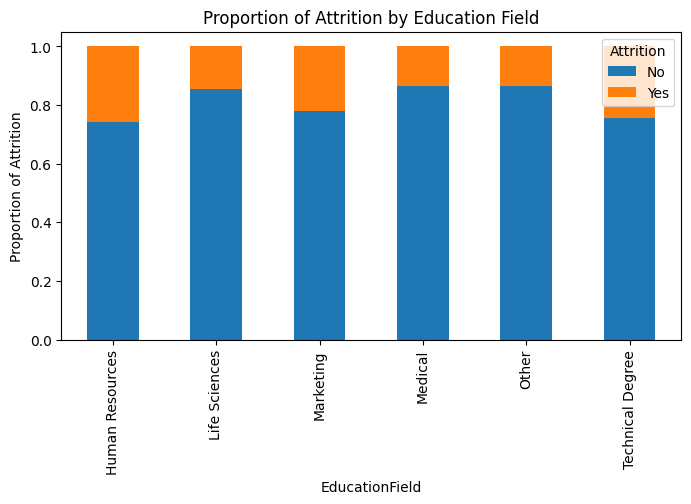

In [34]:
# Creating a cross-tabulation
cross_tab = pd.crosstab(df['EducationField'], df['Attrition'], normalize='index')

# Stacked Bar Chart
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4))

plt.title('Proportion of Attrition by Education Field')
plt.xlabel('EducationField')
plt.ylabel('Proportion of Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.show()

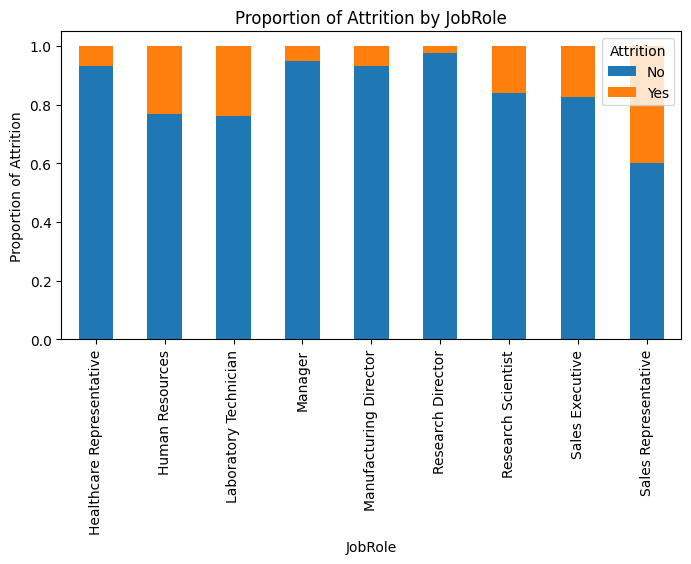

In [35]:
# Creating a cross-tabulation
cross_tab = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index')

# Stacked Bar Chart
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4))

plt.title('Proportion of Attrition by JobRole')
plt.xlabel('JobRole')
plt.ylabel('Proportion of Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.show()

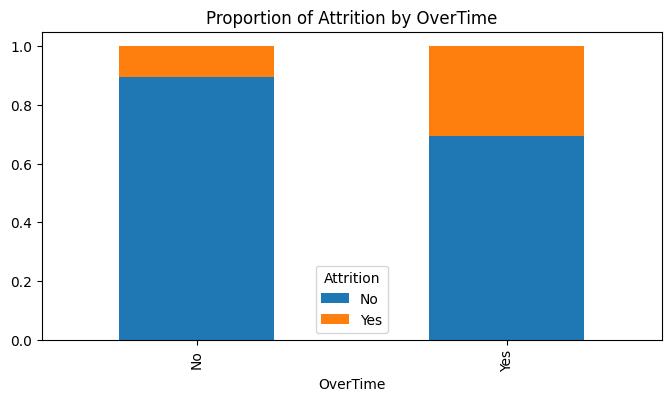

In [37]:
# Creating a cross-tabulation
cross_tab = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index')

# Stacked Bar Chart
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4))

plt.title('Proportion of Attrition by OverTime')
plt.xlabel('OverTime')
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.show()

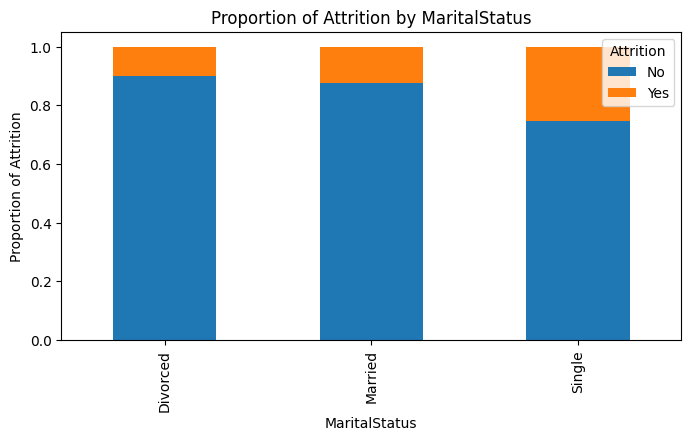

In [36]:
# Creating a cross-tabulation
cross_tab = pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize='index')

# Stacked Bar Chart
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4))

plt.title('Proportion of Attrition by MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Proportion of Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.show()

In [3]:
pd.set_option('display.max_columns', None) # Display any number of columns

In [4]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1167,35,Yes,Travel_Rarely,763,Sales,15,2,Medical,1,1645,1,Male,59,1,2,Sales Executive,4,Divorced,5440,22098,6,Y,Yes,14,3,4,80,2,7,2,2,2,2,2,2
686,41,No,Travel_Rarely,263,Research & Development,6,3,Medical,1,957,4,Male,59,3,1,Laboratory Technician,1,Single,4721,3119,2,Y,Yes,13,3,3,80,0,20,3,3,18,13,2,17
1020,47,No,Travel_Rarely,465,Research & Development,1,3,Technical Degree,1,1438,1,Male,74,3,1,Research Scientist,4,Married,3420,10205,7,Y,No,12,3,3,80,1,17,2,2,6,5,1,2
332,54,No,Travel_Frequently,928,Research & Development,20,4,Life Sciences,1,450,4,Female,31,3,2,Research Scientist,3,Single,4869,16885,3,Y,No,12,3,4,80,0,20,4,2,4,3,0,3
707,47,No,Travel_Frequently,1379,Research & Development,16,4,Medical,1,987,3,Male,64,4,2,Manufacturing Director,3,Divorced,5067,6759,1,Y,Yes,19,3,3,80,0,20,3,4,19,10,2,7


In [5]:
df_work = df

In [6]:
df_work.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df_work.shape

(1470, 35)

In [8]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df_work.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df_work.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df_work.duplicated().any()

False

In [12]:
df_work.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
366,41,Yes,Travel_Frequently,143,Sales,4,3,Marketing,1,488,1,Male,56,3,2,Sales Executive,2,Single,9355,9558,1,Y,No,18,3,3,80,0,8,5,3,8,7,7,7
1139,32,No,Travel_Rarely,634,Research & Development,5,4,Other,1,1607,2,Female,35,4,1,Research Scientist,4,Married,3312,18783,3,Y,No,17,3,4,80,2,6,3,3,3,2,0,2
392,54,No,Travel_Rarely,821,Research & Development,5,2,Medical,1,522,1,Male,86,3,5,Research Director,1,Married,19406,8509,4,Y,No,11,3,3,80,1,24,4,2,4,2,1,2
1433,25,No,Travel_Rarely,1382,Sales,8,2,Other,1,2018,1,Female,85,3,2,Sales Executive,3,Divorced,4907,13684,0,Y,Yes,22,4,2,80,1,6,3,2,5,3,0,4
1124,39,No,Travel_Rarely,1462,Sales,6,3,Medical,1,1588,4,Male,38,4,3,Sales Executive,3,Married,8237,4658,2,Y,No,11,3,1,80,1,11,3,3,7,6,7,6


In [13]:
df_work['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

<Axes: xlabel='Attrition'>

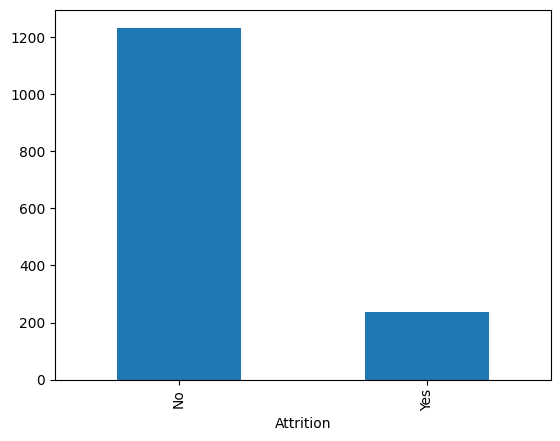

In [14]:
df_work['Attrition'].value_counts().plot(kind='bar')

In [15]:
df_work['Attrition'] = df_work['Attrition'].map({'No': 0, 'Yes': 1})

In [16]:
df_work['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [17]:
X = df_work.drop(columns=['Attrition'])

In [18]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [19]:
y = df_work['Attrition']

In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [21]:
X.sample(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
288,26,Travel_Rarely,1449,Research & Development,16,4,Medical,1,394,1,Male,45,3,1,Laboratory Technician,2,Divorced,2373,14180,2,Y,Yes,13,3,4,80,1,5,2,3,3,2,0,2
1273,22,Travel_Rarely,1294,Research & Development,8,1,Medical,1,1783,3,Female,79,3,1,Laboratory Technician,1,Married,2398,15999,1,Y,Yes,17,3,3,80,0,1,6,3,1,0,0,0
524,34,Travel_Rarely,1442,Research & Development,9,3,Medical,1,717,4,Female,46,2,3,Healthcare Representative,2,Single,8621,17654,1,Y,No,14,3,2,80,0,9,3,4,8,7,7,7
1176,49,Travel_Rarely,301,Research & Development,22,4,Other,1,1655,1,Female,72,3,4,Research Director,2,Married,16413,3498,3,Y,No,16,3,2,80,2,27,2,3,4,2,1,2
999,42,Travel_Rarely,1147,Human Resources,10,3,Human Resources,1,1408,3,Female,31,3,4,Manager,1,Married,16799,16616,0,Y,No,14,3,3,80,1,21,5,3,20,7,0,9


In [22]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [23]:
numerical_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [24]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [25]:
categorical_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [26]:
df_work['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
df_work['Over18'].unique()

array(['Y'], dtype=object)

In [28]:
X = X.drop(columns=['Over18'])

In [29]:
X.sample(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
819,28,Travel_Rarely,1451,Research & Development,2,1,Life Sciences,1,1136,1,Male,67,2,1,Research Scientist,2,Married,3201,19911,0,No,17,3,1,80,0,6,2,1,5,3,0,4
639,49,Travel_Rarely,1418,Research & Development,1,3,Technical Degree,1,887,3,Female,36,3,1,Research Scientist,1,Married,3580,10554,2,No,16,3,2,80,1,7,2,3,4,2,0,2
39,33,Travel_Frequently,1141,Sales,1,3,Life Sciences,1,52,3,Female,42,4,2,Sales Executive,1,Married,5376,3193,2,No,19,3,1,80,2,10,3,3,5,3,1,3
961,35,Travel_Frequently,482,Research & Development,4,4,Life Sciences,1,1350,3,Male,87,3,2,Research Scientist,3,Single,4249,2690,1,Yes,11,3,2,80,0,9,3,3,9,6,1,1
1083,40,Travel_Rarely,676,Research & Development,9,4,Life Sciences,1,1534,4,Male,86,3,1,Laboratory Technician,1,Single,2018,21831,3,No,14,3,2,80,0,15,3,1,5,4,1,0


In [30]:
X['EmployeeCount'].unique()

array([1], dtype=int64)

In [31]:
X = X.drop(columns=['EmployeeCount'])

In [32]:
X.sample(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
519,29,Travel_Frequently,806,Research & Development,1,4,Life Sciences,710,2,Male,76,1,1,Research Scientist,4,Divorced,2720,18959,1,No,18,3,4,80,1,10,5,3,10,7,2,8
1092,45,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,No,20,4,4,80,1,8,3,3,5,4,0,3


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeNumber'}>],
       [<Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>],
       [<Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        

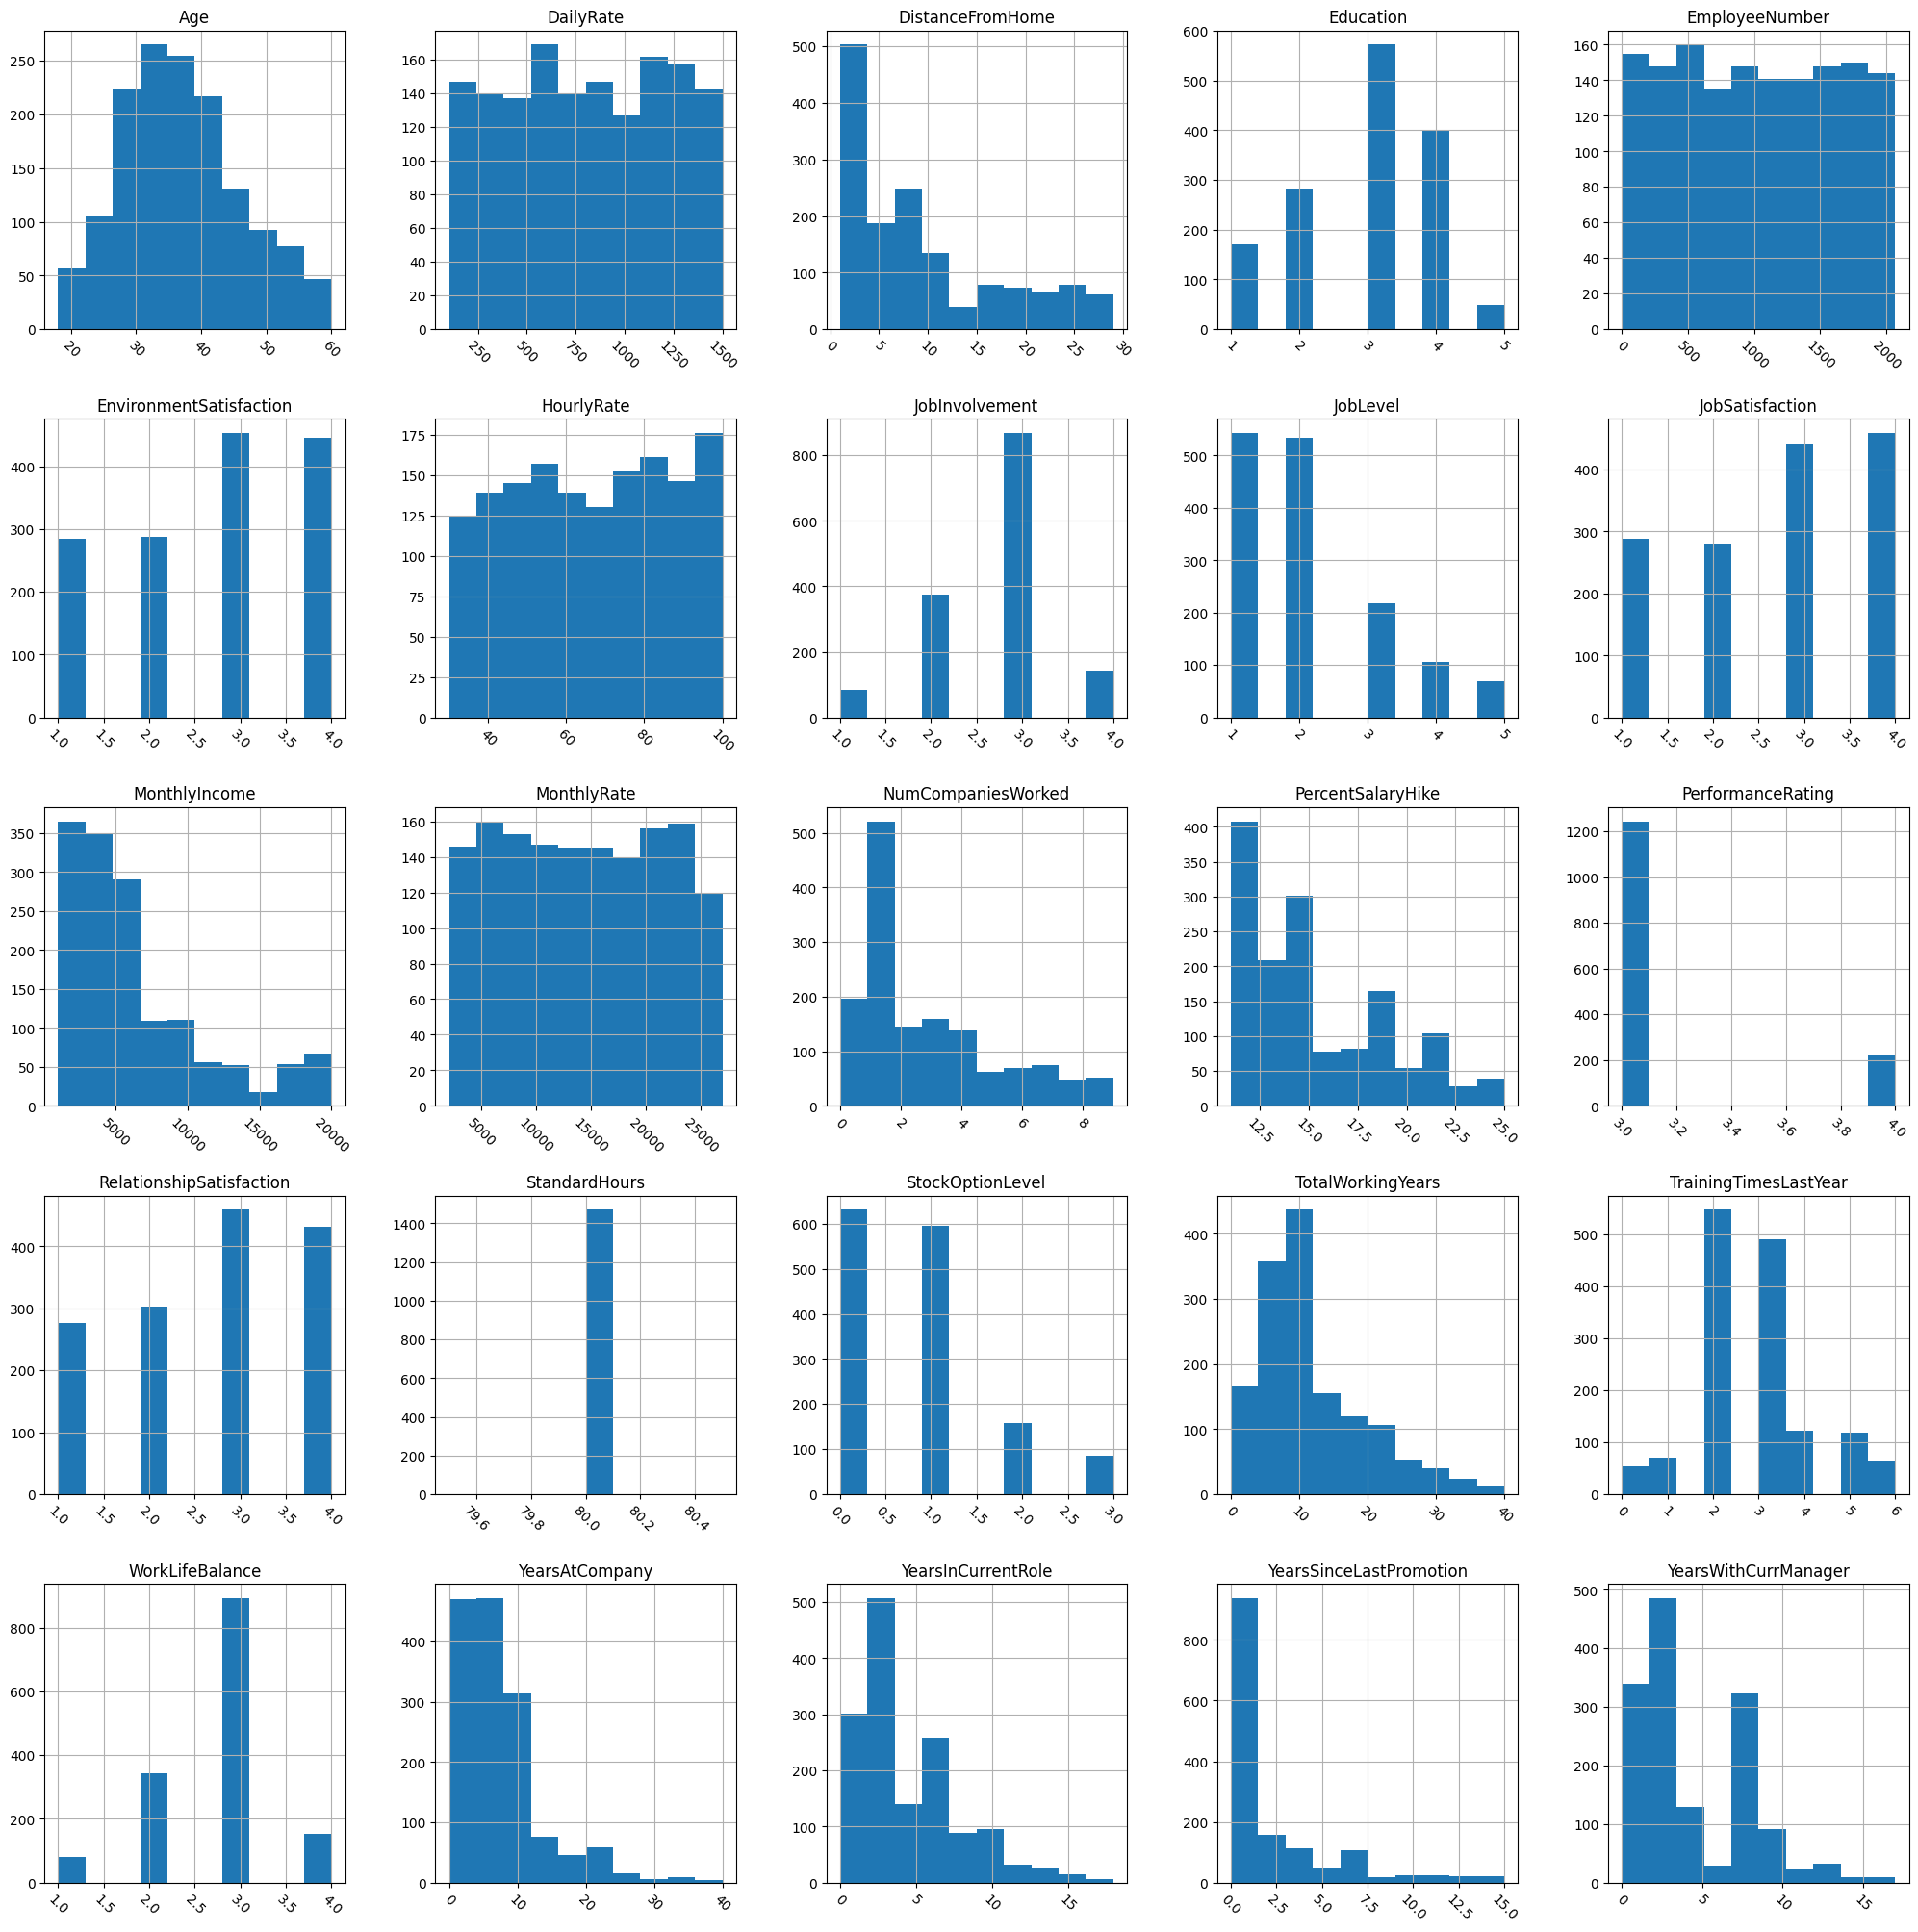

In [33]:
X.hist(figsize=(25,25), xrot=-45)

In [34]:
X = X.drop(columns=['EmployeeNumber'])

In [35]:
X.head(1)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5


In [36]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [37]:
X[numerical_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [38]:
X['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [39]:
df_numeric = X[numerical_cols]

In [40]:
df_numeric.sample(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,1282,5,3,3,58,3,5,3,19094,10735,4,11,3,4,80,1,26,3,2,14,13,4,8
346,41,483,6,3,4,95,2,2,2,6032,10110,6,15,3,4,80,0,8,3,3,5,4,1,2
1045,40,896,2,3,3,68,3,1,3,2345,8045,2,14,3,3,80,1,8,3,4,3,1,1,2


In [41]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5


In [42]:
df_numeric['Attrition'] = df['Attrition']

C:\Users\Shahin\AppData\Local\Temp\ipykernel_21684\2748228475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Attrition'] = df['Attrition']


In [43]:
df_numeric.sample(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1255,33,211,16,3,1,74,3,3,1,8564,10092,2,20,4,3,80,0,11,2,2,0,0,0,0,1
661,43,177,8,3,1,55,3,2,2,4765,23814,4,21,4,3,80,1,4,2,4,1,0,0,0,0
540,28,654,1,2,1,67,1,1,2,2216,3872,7,13,3,4,80,0,10,4,3,7,7,3,7,1
937,39,412,13,4,3,94,2,4,2,17123,17334,6,13,3,4,80,2,21,4,3,19,9,15,2,0
881,32,1316,2,2,4,38,3,2,3,4998,2338,4,14,3,4,80,0,10,2,3,8,7,0,7,0


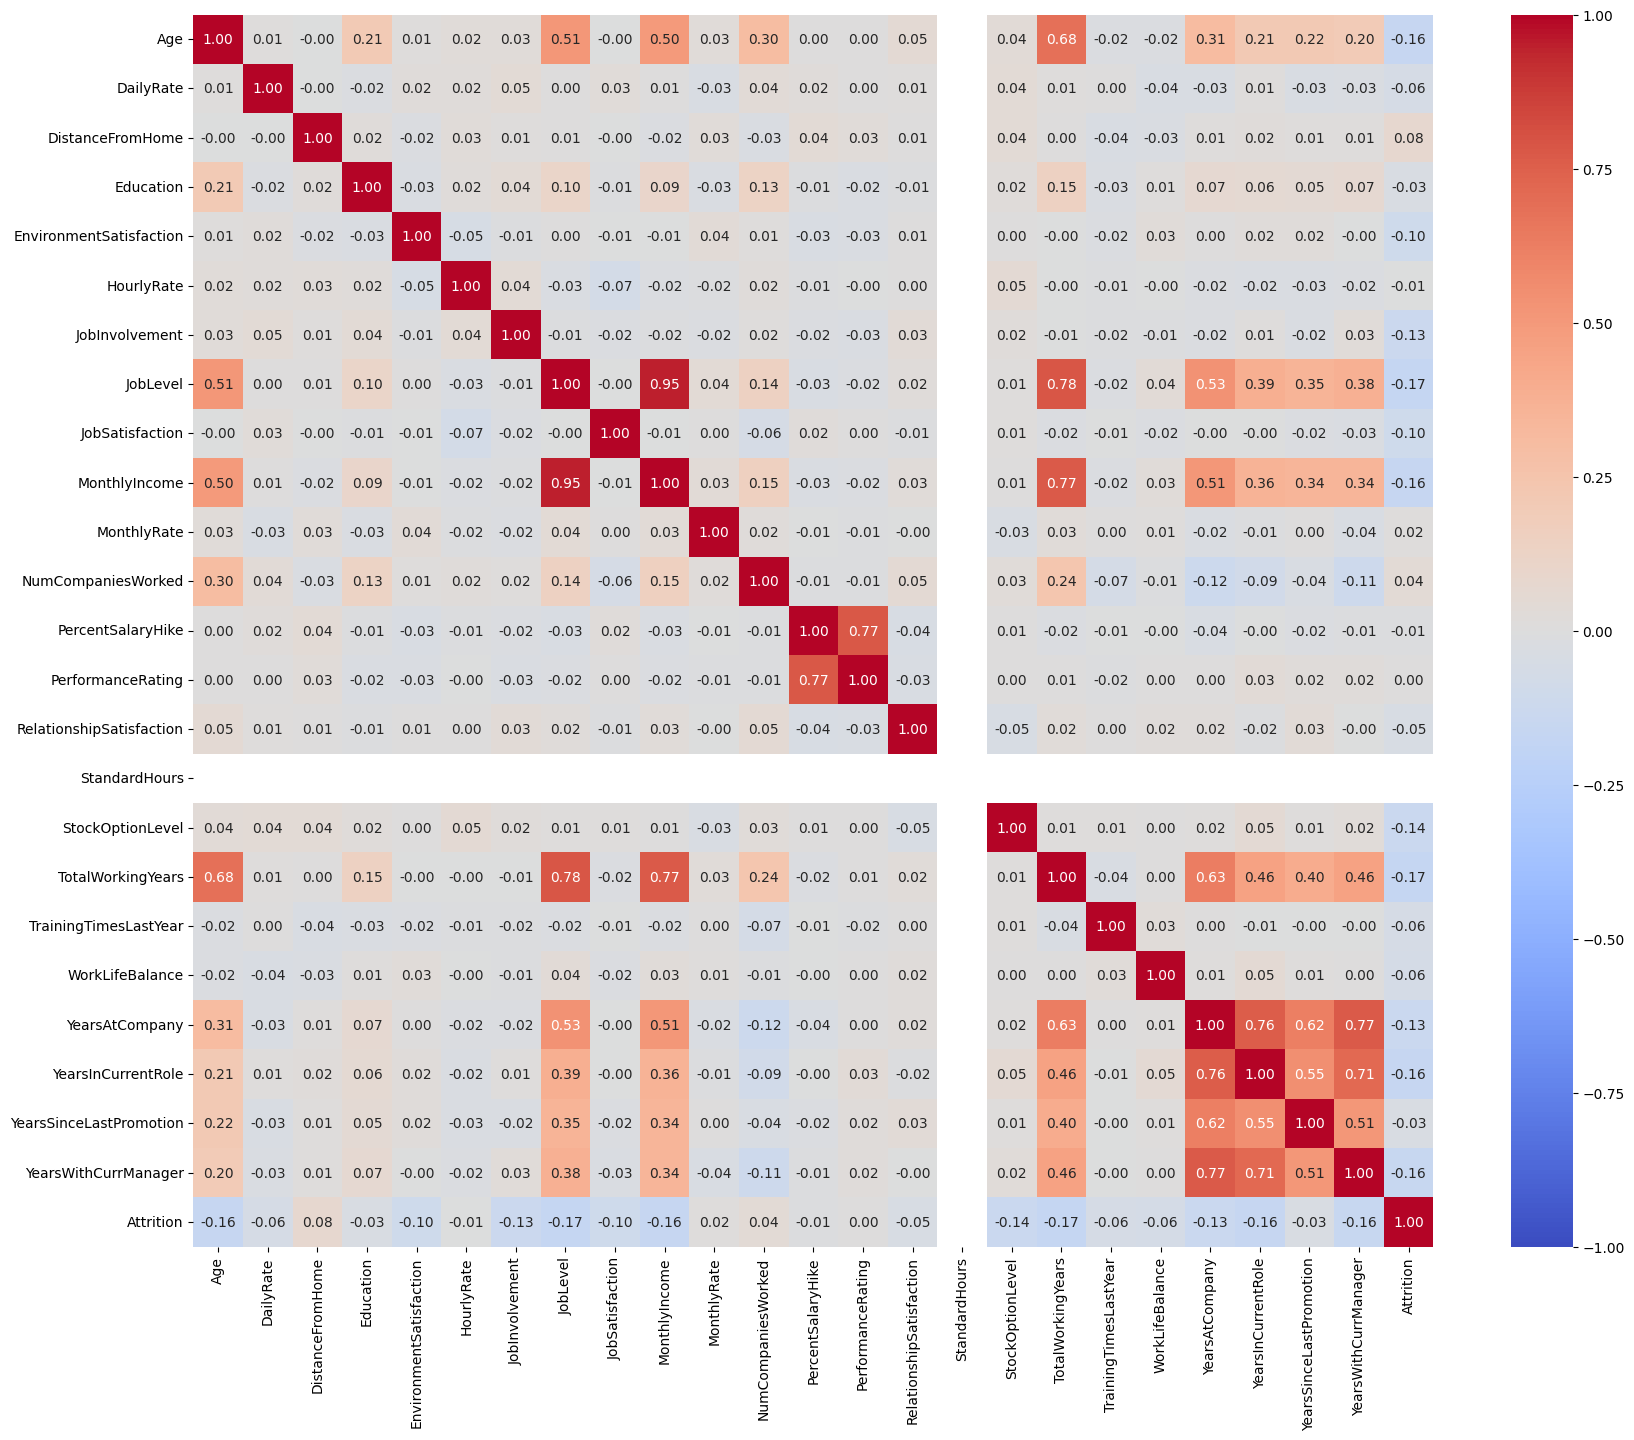

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

In [45]:
X = X.drop(columns=['StandardHours'])

In [46]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [47]:
df_numeric = X[numerical_cols]

In [42]:
df_numeric = df[['JobLevel', 'MonthlyIncome', 'JobSatisfaction', 'DistanceFromHome', 'NumCompaniesWorked']]

In [43]:
df_numeric

,JobLevel,MonthlyIncome,JobSatisfaction,DistanceFromHome,NumCompaniesWorked
0,2,5993,4,1,8
1,2,5130,2,8,1
2,1,2090,3,2,6
3,1,2909,3,3,1
4,1,3468,2,2,9
...,...,...,...,...,...
1465,2,2571,4,23,4
1466,3,9991,1,6,4
1467,2,6142,2,4,1
1468,2,5390,2,2,2


In [50]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [51]:
X[categorical_cols].sample(5)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
634,Travel_Rarely,Sales,Other,Male,Sales Executive,Married,Yes
588,Travel_Rarely,Research & Development,Medical,Male,Research Director,Married,No
608,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,No
96,Travel_Rarely,Sales,Other,Female,Sales Executive,Married,No
598,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Single,No


In [52]:
df_categorical = X[categorical_cols]

In [53]:
df_categorical.sample(3)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
1317,Travel_Frequently,Research & Development,Life Sciences,Female,Laboratory Technician,Single,Yes
596,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Single,No
742,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Married,No


In [54]:
df_categorical_encoded = pd.get_dummies(df_categorical)

In [55]:
df_categorical_encoded.sample(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1442,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True
1018,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False
1132,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False
10,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False
936,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False


In [56]:
df_categorical_encoded['Attrition'] = df['Attrition']

In [57]:
df_categorical_encoded.sample(10)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
255,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,0
876,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,0
213,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,0
1267,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,0
923,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,0
645,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,1
1464,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,0
221,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,0
223,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,0
231,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,0


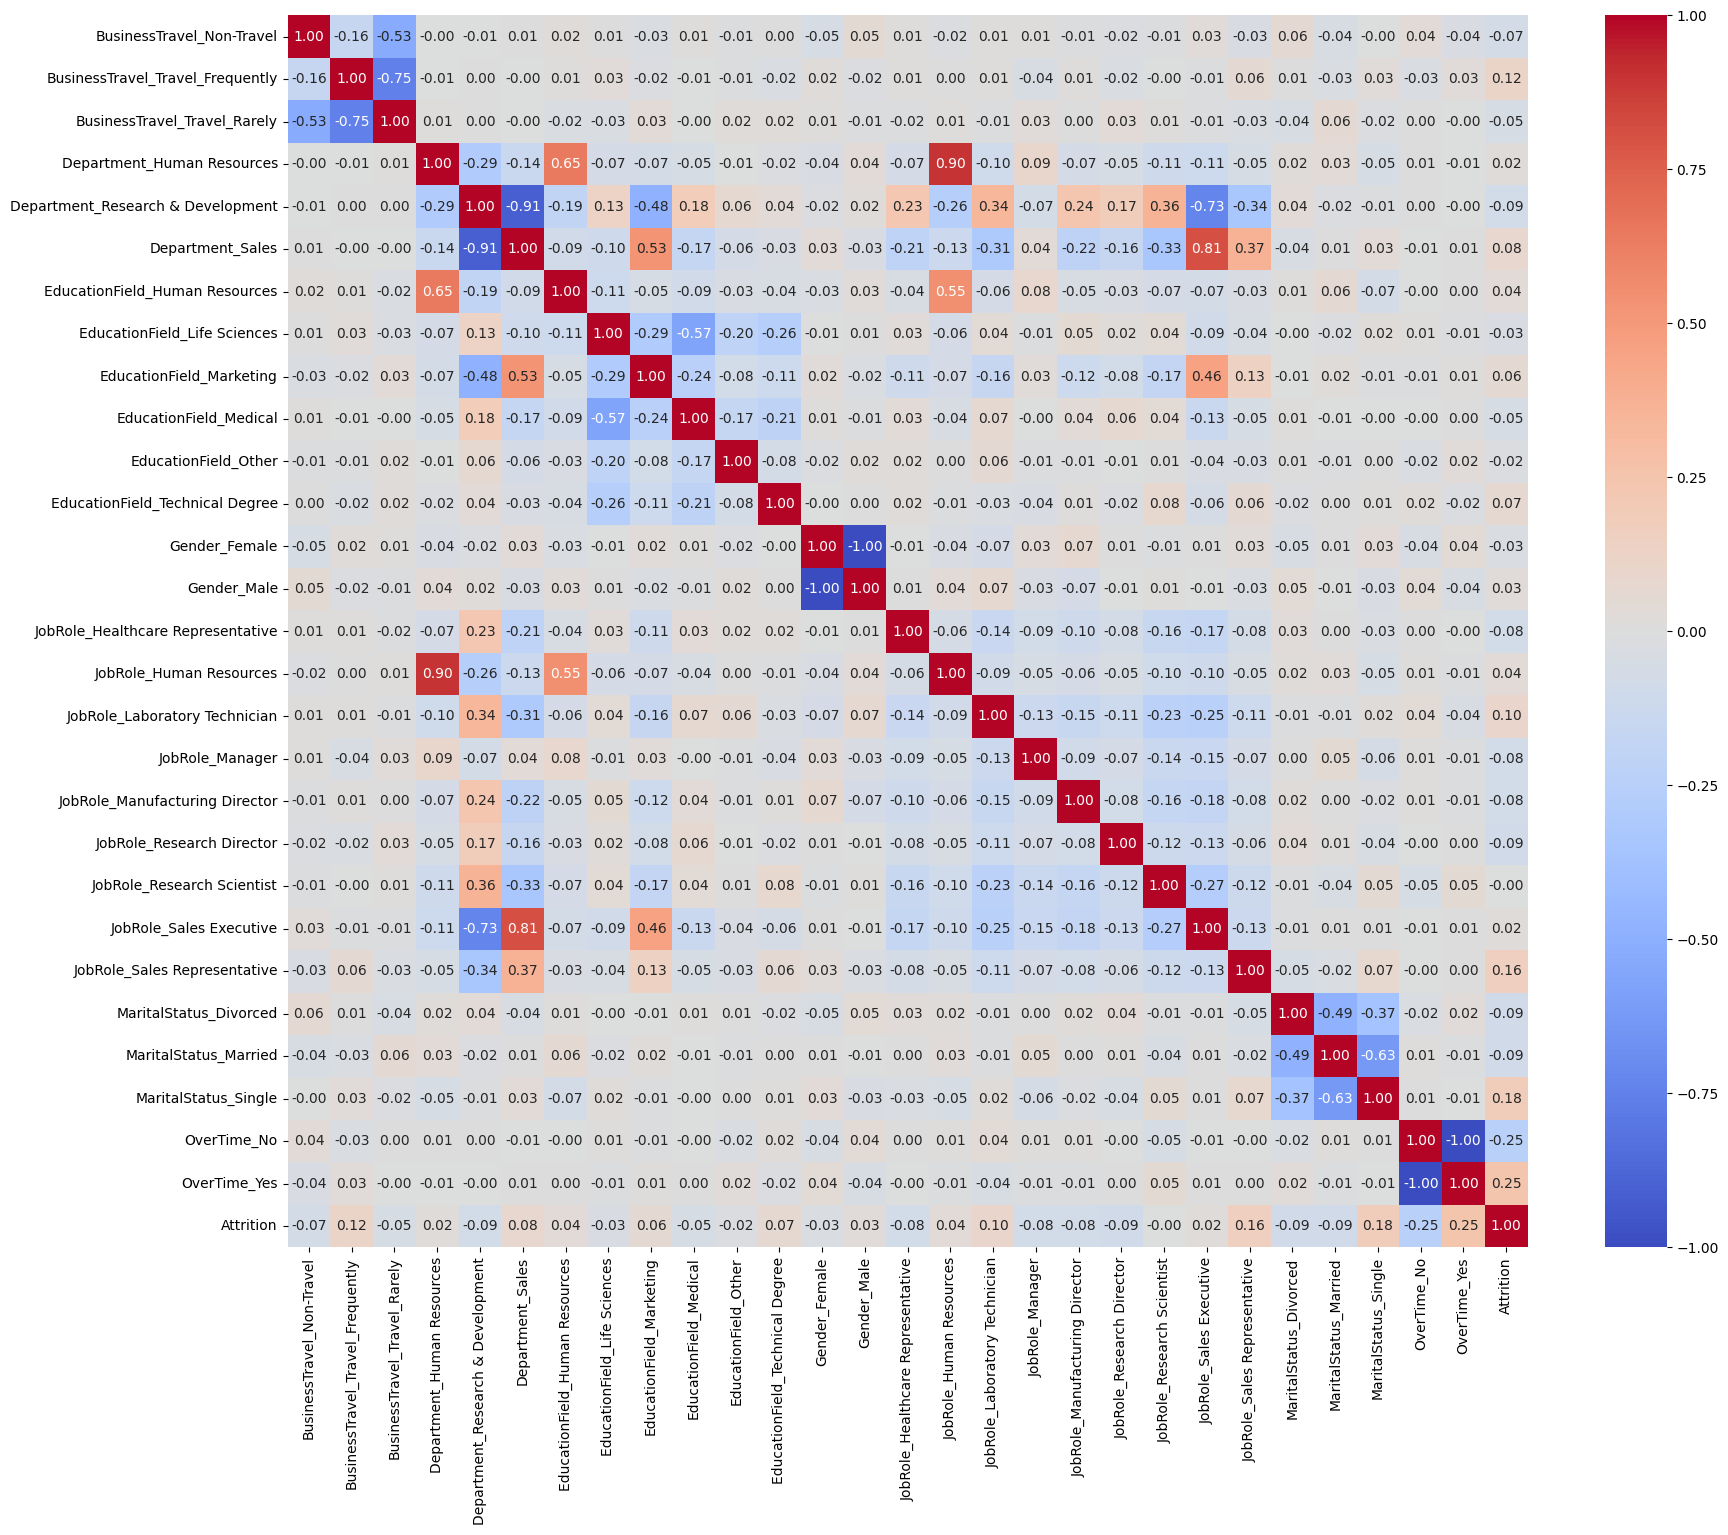

In [58]:
# Calculate the correlation matrix
corr_matrix = df_categorical_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

In [44]:
df_categorical = df[['BusinessTravel', 'OverTime', 'MaritalStatus', 'JobRole', 'EducationField', 'Department']]

In [45]:
df_categorical

,BusinessTravel,OverTime,MaritalStatus,JobRole,EducationField,Department
0,Travel_Rarely,Yes,Single,Sales Executive,Life Sciences,Sales
1,Travel_Frequently,No,Married,Research Scientist,Life Sciences,Research & Development
2,Travel_Rarely,Yes,Single,Laboratory Technician,Other,Research & Development
3,Travel_Frequently,Yes,Married,Research Scientist,Life Sciences,Research & Development
4,Travel_Rarely,No,Married,Laboratory Technician,Medical,Research & Development
...,...,...,...,...,...,...
1465,Travel_Frequently,No,Married,Laboratory Technician,Medical,Research & Development
1466,Travel_Rarely,No,Married,Healthcare Representative,Medical,Research & Development
1467,Travel_Rarely,Yes,Married,Manufacturing Director,Life Sciences,Research & Development
1468,Travel_Frequently,No,Married,Sales Executive,Medical,Sales


In [46]:
X = pd.concat([df_categorical, df_numeric], axis=1)

In [47]:
X.head()

,BusinessTravel,OverTime,MaritalStatus,JobRole,EducationField,Department,JobLevel,MonthlyIncome,JobSatisfaction,DistanceFromHome,NumCompaniesWorked
0,Travel_Rarely,Yes,Single,Sales Executive,Life Sciences,Sales,2,5993,4,1,8
1,Travel_Frequently,No,Married,Research Scientist,Life Sciences,Research & Development,2,5130,2,8,1
2,Travel_Rarely,Yes,Single,Laboratory Technician,Other,Research & Development,1,2090,3,2,6
3,Travel_Frequently,Yes,Married,Research Scientist,Life Sciences,Research & Development,1,2909,3,3,1
4,Travel_Rarely,No,Married,Laboratory Technician,Medical,Research & Development,1,3468,2,2,9


In [48]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [49]:
categorical_cols = ['BusinessTravel', 'OverTime', 'MaritalStatus', 'JobRole', 'EducationField', 'Department']
numerical_cols = ['JobLevel', 'MonthlyIncome', 'JobSatisfaction', 'DistanceFromHome', 'NumCompaniesWorked']

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create lists for transformers based on data types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Define the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('nominal', categorical_transformer, categorical_cols),
], remainder='passthrough')

In [52]:
y = df['Attrition']

In [56]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [57]:
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

In [58]:
y = df['Attrition']

In [59]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

Classifier: Logistic Regression


Accuracy: 0.8605442176870748
Precision: 0.6875
Recall: 0.23404255319148937
F1-Score: 0.3492063492063492
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.69      0.23      0.35        47

    accuracy                           0.86       294
   macro avg       0.78      0.61      0.64       294
weighted avg       0.84      0.86      0.83       294



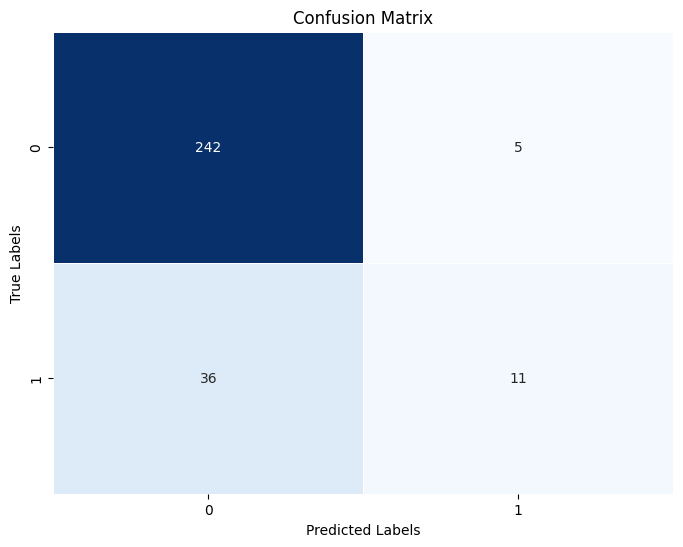



AUC-ROC Score: 0.7816349384098544




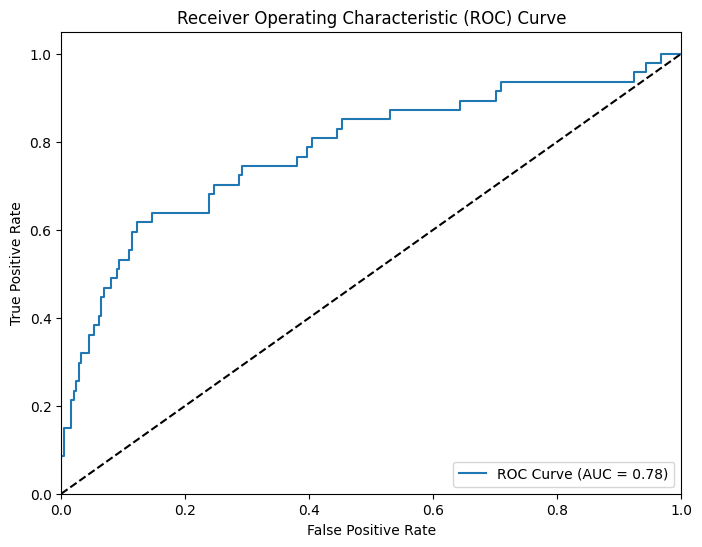



Classifier: Decision Tree


Accuracy: 0.7857142857142857
Precision: 0.3333333333333333
Recall: 0.3404255319148936
F1-Score: 0.3368421052631579
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       247
           1       0.33      0.34      0.34        47

    accuracy                           0.79       294
   macro avg       0.60      0.61      0.60       294
weighted avg       0.79      0.79      0.79       294



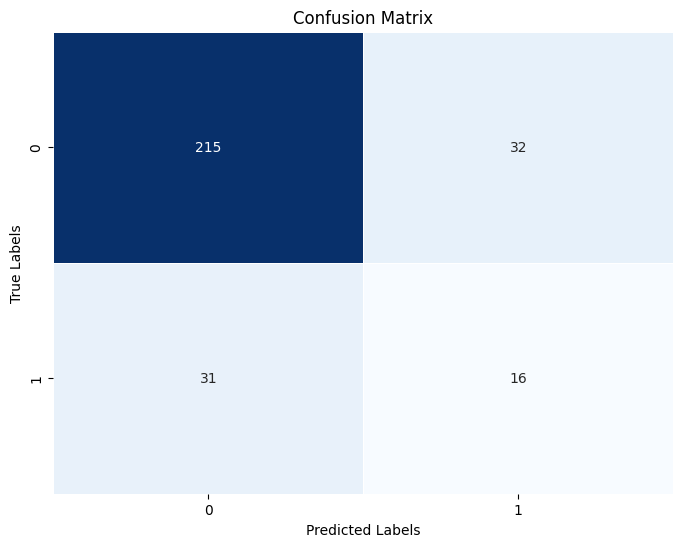



AUC-ROC Score: 0.6054354380222242




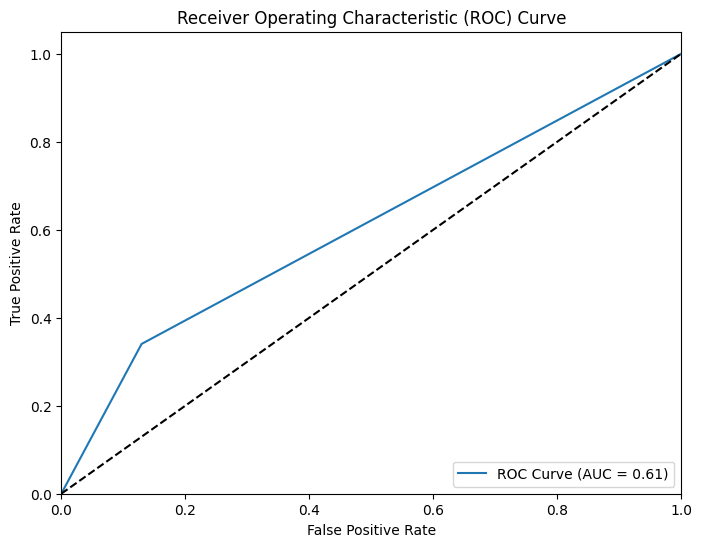



Classifier: XGBoost


Accuracy: 0.8299319727891157
Precision: 0.4444444444444444
Recall: 0.2553191489361702
F1-Score: 0.32432432432432434
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.44      0.26      0.32        47

    accuracy                           0.83       294
   macro avg       0.66      0.60      0.61       294
weighted avg       0.80      0.83      0.81       294



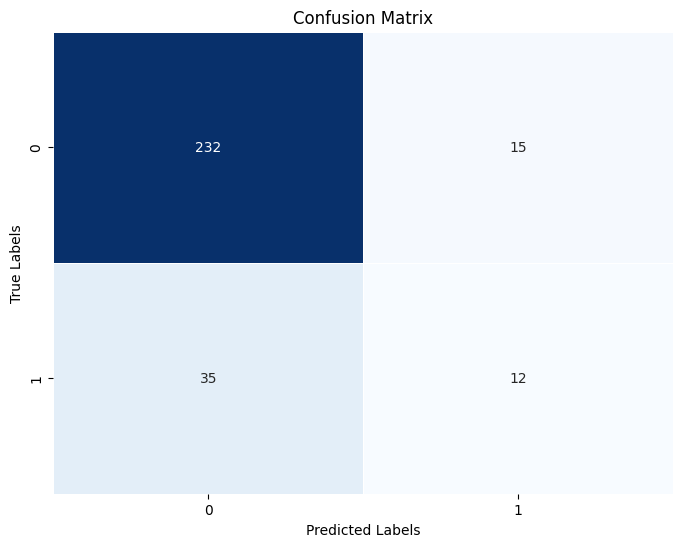



AUC-ROC Score: 0.7142734085623224




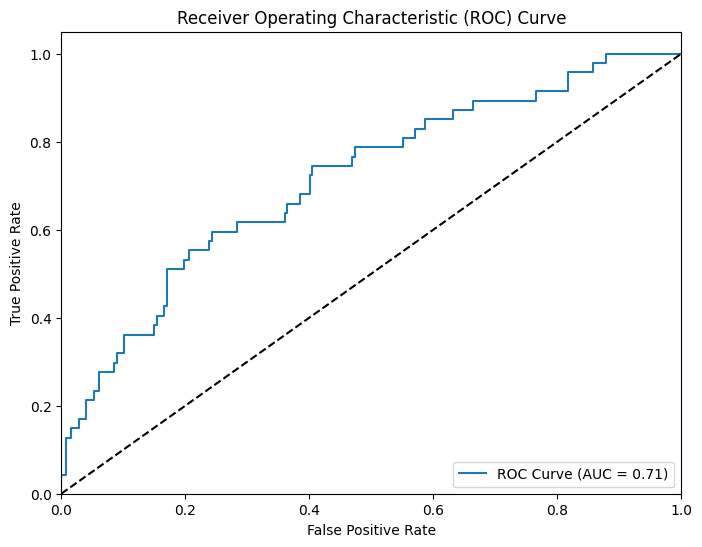



Classifier: Random Forest


Accuracy: 0.8469387755102041
Precision: 0.55
Recall: 0.23404255319148937
F1-Score: 0.3283582089552239
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.55      0.23      0.33        47

    accuracy                           0.85       294
   macro avg       0.71      0.60      0.62       294
weighted avg       0.82      0.85      0.82       294



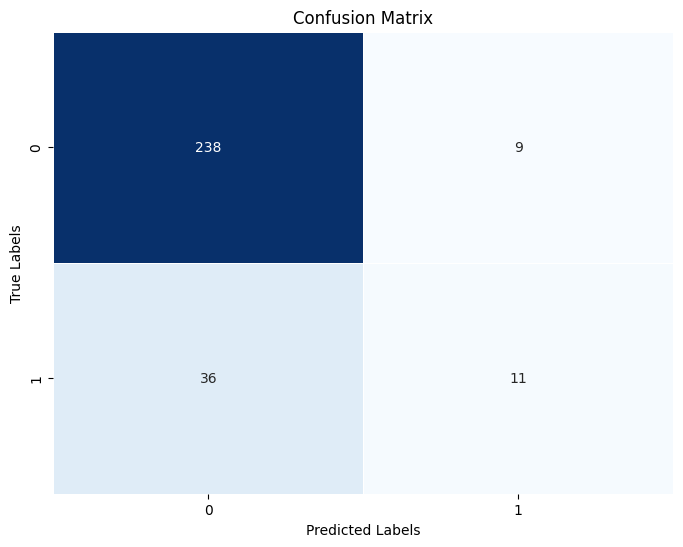



AUC-ROC Score: 0.7694030493582565




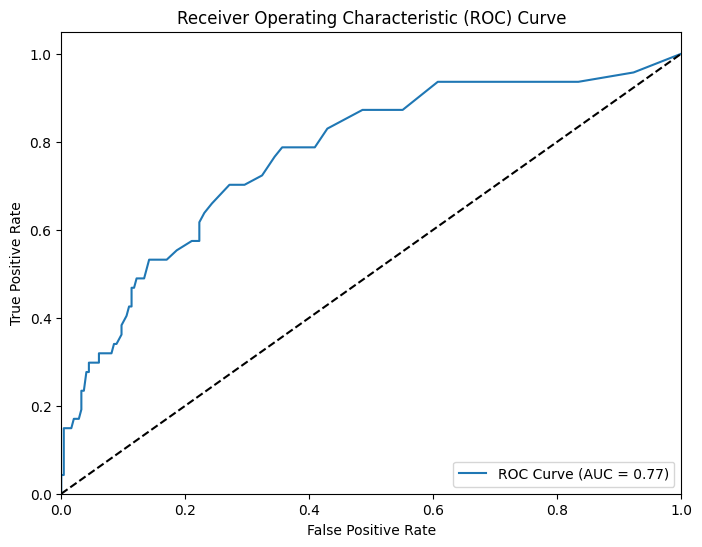

In [62]:
# Define a function for training and evaluating a classifier
def train_evaluate_classifier(classifier, classifier_name):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', classifier)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\033[1mClassifier: {classifier_name}\033[0m")  # Print the classifier name in bold
    print('\n')
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    # Display the classification report
    report = classification_report(y_test, y_pred)
    print(report)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    print('\n')

    # Calculate the AUC-ROC Score
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    print(f"AUC-ROC Score: {roc_auc}")
    print('\n')

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    print('\n')

# List of classifiers to test along with their names
classifiers_to_test = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (XGBClassifier(), "XGBoost"),
    (RandomForestClassifier(), "Random Forest")
]

# Loop through the classifiers and evaluate them
for classifier, classifier_name in classifiers_to_test:
    train_evaluate_classifier(classifier, classifier_name)

In [39]:
# Building a pipeline with the champion model - Random Forest Classifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=0))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction',
                                                   'last_evaluation',
                                                   'n_projects',
                                                   'avg_monthly_hrs',
                                                   'tenure']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['department',
                                                   'filed_complaint',
                                                   'recently_promoted']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [40]:
# Create a DataFrame with the new data for prediction
sample_data = pd.DataFrame({
    'satisfaction': [0.127],             # Corresponds to 'satisfaction' column
    'last_evaluation': [0.834],          # Corresponds to 'last_evaluation' column
    'n_projects': [6],                  # Corresponds to 'n_projects' column
    'avg_monthly_hrs': [283],           # Corresponds to 'avg_monthly_hrs' column
    'tenure': [4],                      # Corresponds to 'tenure' column
    'filed_complaint': ['Yes'],          # Corresponds to 'filed_complaint' column
    'recently_promoted': ['Missing'],        # Corresponds to 'recently_promoted' column
    'department': ['engineering'],            # Use the appropriate department
    'salary': ['low']                   # Use the appropriate salary level
})

# Preprocess and make predictions using your existing pipeline
predicted_label = pipeline.predict(sample_data)

# Display the result
if predicted_label[0] == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")


An Employee may leave the organization


In [41]:
import joblib

joblib.dump(pipeline, '../models/dataset-1_model_rf.pkl')

['../models/dataset-1_model_rf.pkl']